In [ ]:
#Import relevant packages 
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# This section imports the network hs92 file
# Load the JSON file
with open('../data/network_hs92_4digit.json') as f:
    data = json.load(f)

# 'network_hs92_4digit.json' comes with 'edges' instead of 'links'
# Rename 'edges' to 'links' to avoid error
data['links'] = data.pop('edges')
print(data)

# Create a graph from the JSON data
graph = nx.node_link_graph(data)


{'nodes': [{'id': '0910', 'x': 2713.3887939453, 'y': 2416.4245605469}, {'id': '6103', 'x': 2614.3696289062, 'y': 2386.6313476562}, {'id': '6106', 'x': 2583.1158447266, 'y': 2490.0737304688}, {'id': '6108', 'x': 2595.2375488281, 'y': 2421.6455078125}, {'id': '0806', 'x': 2496.6026611328, 'y': 2819.34765625}, {'id': '0813', 'x': 2524.9600830078, 'y': 2827.0993652344}, {'id': '0811', 'x': 2427.9798583984, 'y': 2395.0383300781}, {'id': '6910', 'x': 2479.1219482422, 'y': 2413.466796875}, {'id': '2523', 'x': 2482.0083007812, 'y': 2374.62890625}, {'id': '1205', 'x': 1983.8887939453, 'y': 2673.7119140625}, {'id': '8403', 'x': 1824.0993041992, 'y': 2474.6901855469}, {'id': '1211', 'x': 2613.9614257812, 'y': 2364.1867675781}, {'id': '6109', 'x': 2638.4412841797, 'y': 2405.4008789062}, {'id': '6204', 'x': 2679.7360839844, 'y': 2384.4221191406}, {'id': '6209', 'x': 2727.5308837891, 'y': 2441.7993164062}, {'id': '1101', 'x': 2475.8879394531, 'y': 2259.4719238281}, {'id': '0703', 'x': 2519.166992187

In [ ]:
# display the graph data as pandas data table
df = pd.DataFrame(graph.edges(data=True))

#label the columns 
df.columns = ['source', 'target', 'value']

# value column only displays the number not the dictionary
# convert the dictionary to string and remove 'strength' key
df['value'] = df['value'].apply(lambda x: str(x).replace("{'strength': ", "").replace("}", ""))
                        



In [ ]:
# determine number of unique products in the data 
products = set(df['source']).union(set(df['target'])) # set union to get unique values 
# list all the unique products in the data in numerical order
products = sorted(list(products)) 
print(products)
print(f'The number of unique products in the data is: {len(products)}') 


#create a list of all the edges in the graph 
edges = graph.edges(data=True) 
print(edges)
print(f'The number of edges in the graph is: {len(edges)}')



['0101', '0102', '0103', '0104', '0105', '0201', '0202', '0203', '0204', '0206', '0207', '0208', '0210', '0301', '0302', '0303', '0304', '0305', '0306', '0307', '0401', '0402', '0403', '0404', '0405', '0406', '0407', '0409', '0504', '0511', '0601', '0602', '0603', '0604', '0701', '0702', '0703', '0704', '0705', '0706', '0707', '0708', '0709', '0710', '0712', '0713', '0714', '0801', '0802', '0803', '0804', '0805', '0806', '0807', '0808', '0809', '0810', '0811', '0813', '0901', '0902', '0904', '0910', '1001', '1003', '1005', '1006', '1007', '1101', '1103', '1104', '1107', '1108', '1201', '1202', '1205', '1206', '1207', '1208', '1209', '1211', '1212', '1214', '1302', '1502', '1504', '1507', '1509', '1511', '1512', '1513', '1514', '1515', '1516', '1517', '1518', '1519', '1520', '1601', '1602', '1604', '1605', '1701', '1702', '1704', '1801', '1803', '1804', '1805', '1806', '1901', '1902', '1904', '1905', '2001', '2002', '2003', '2004', '2005', '2007', '2008', '2009', '2101', '2102', '2103',

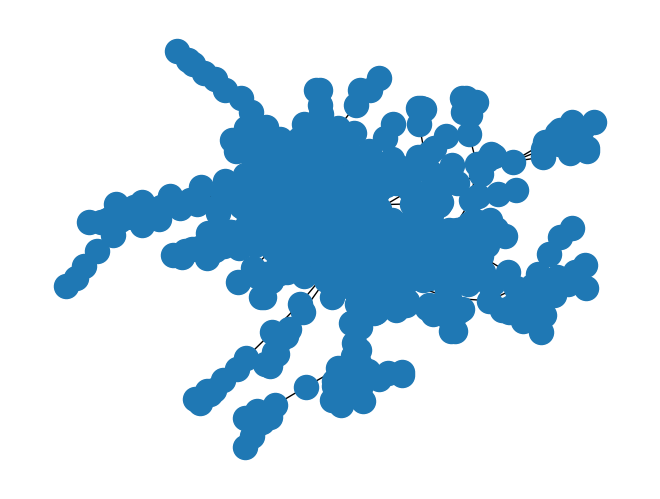

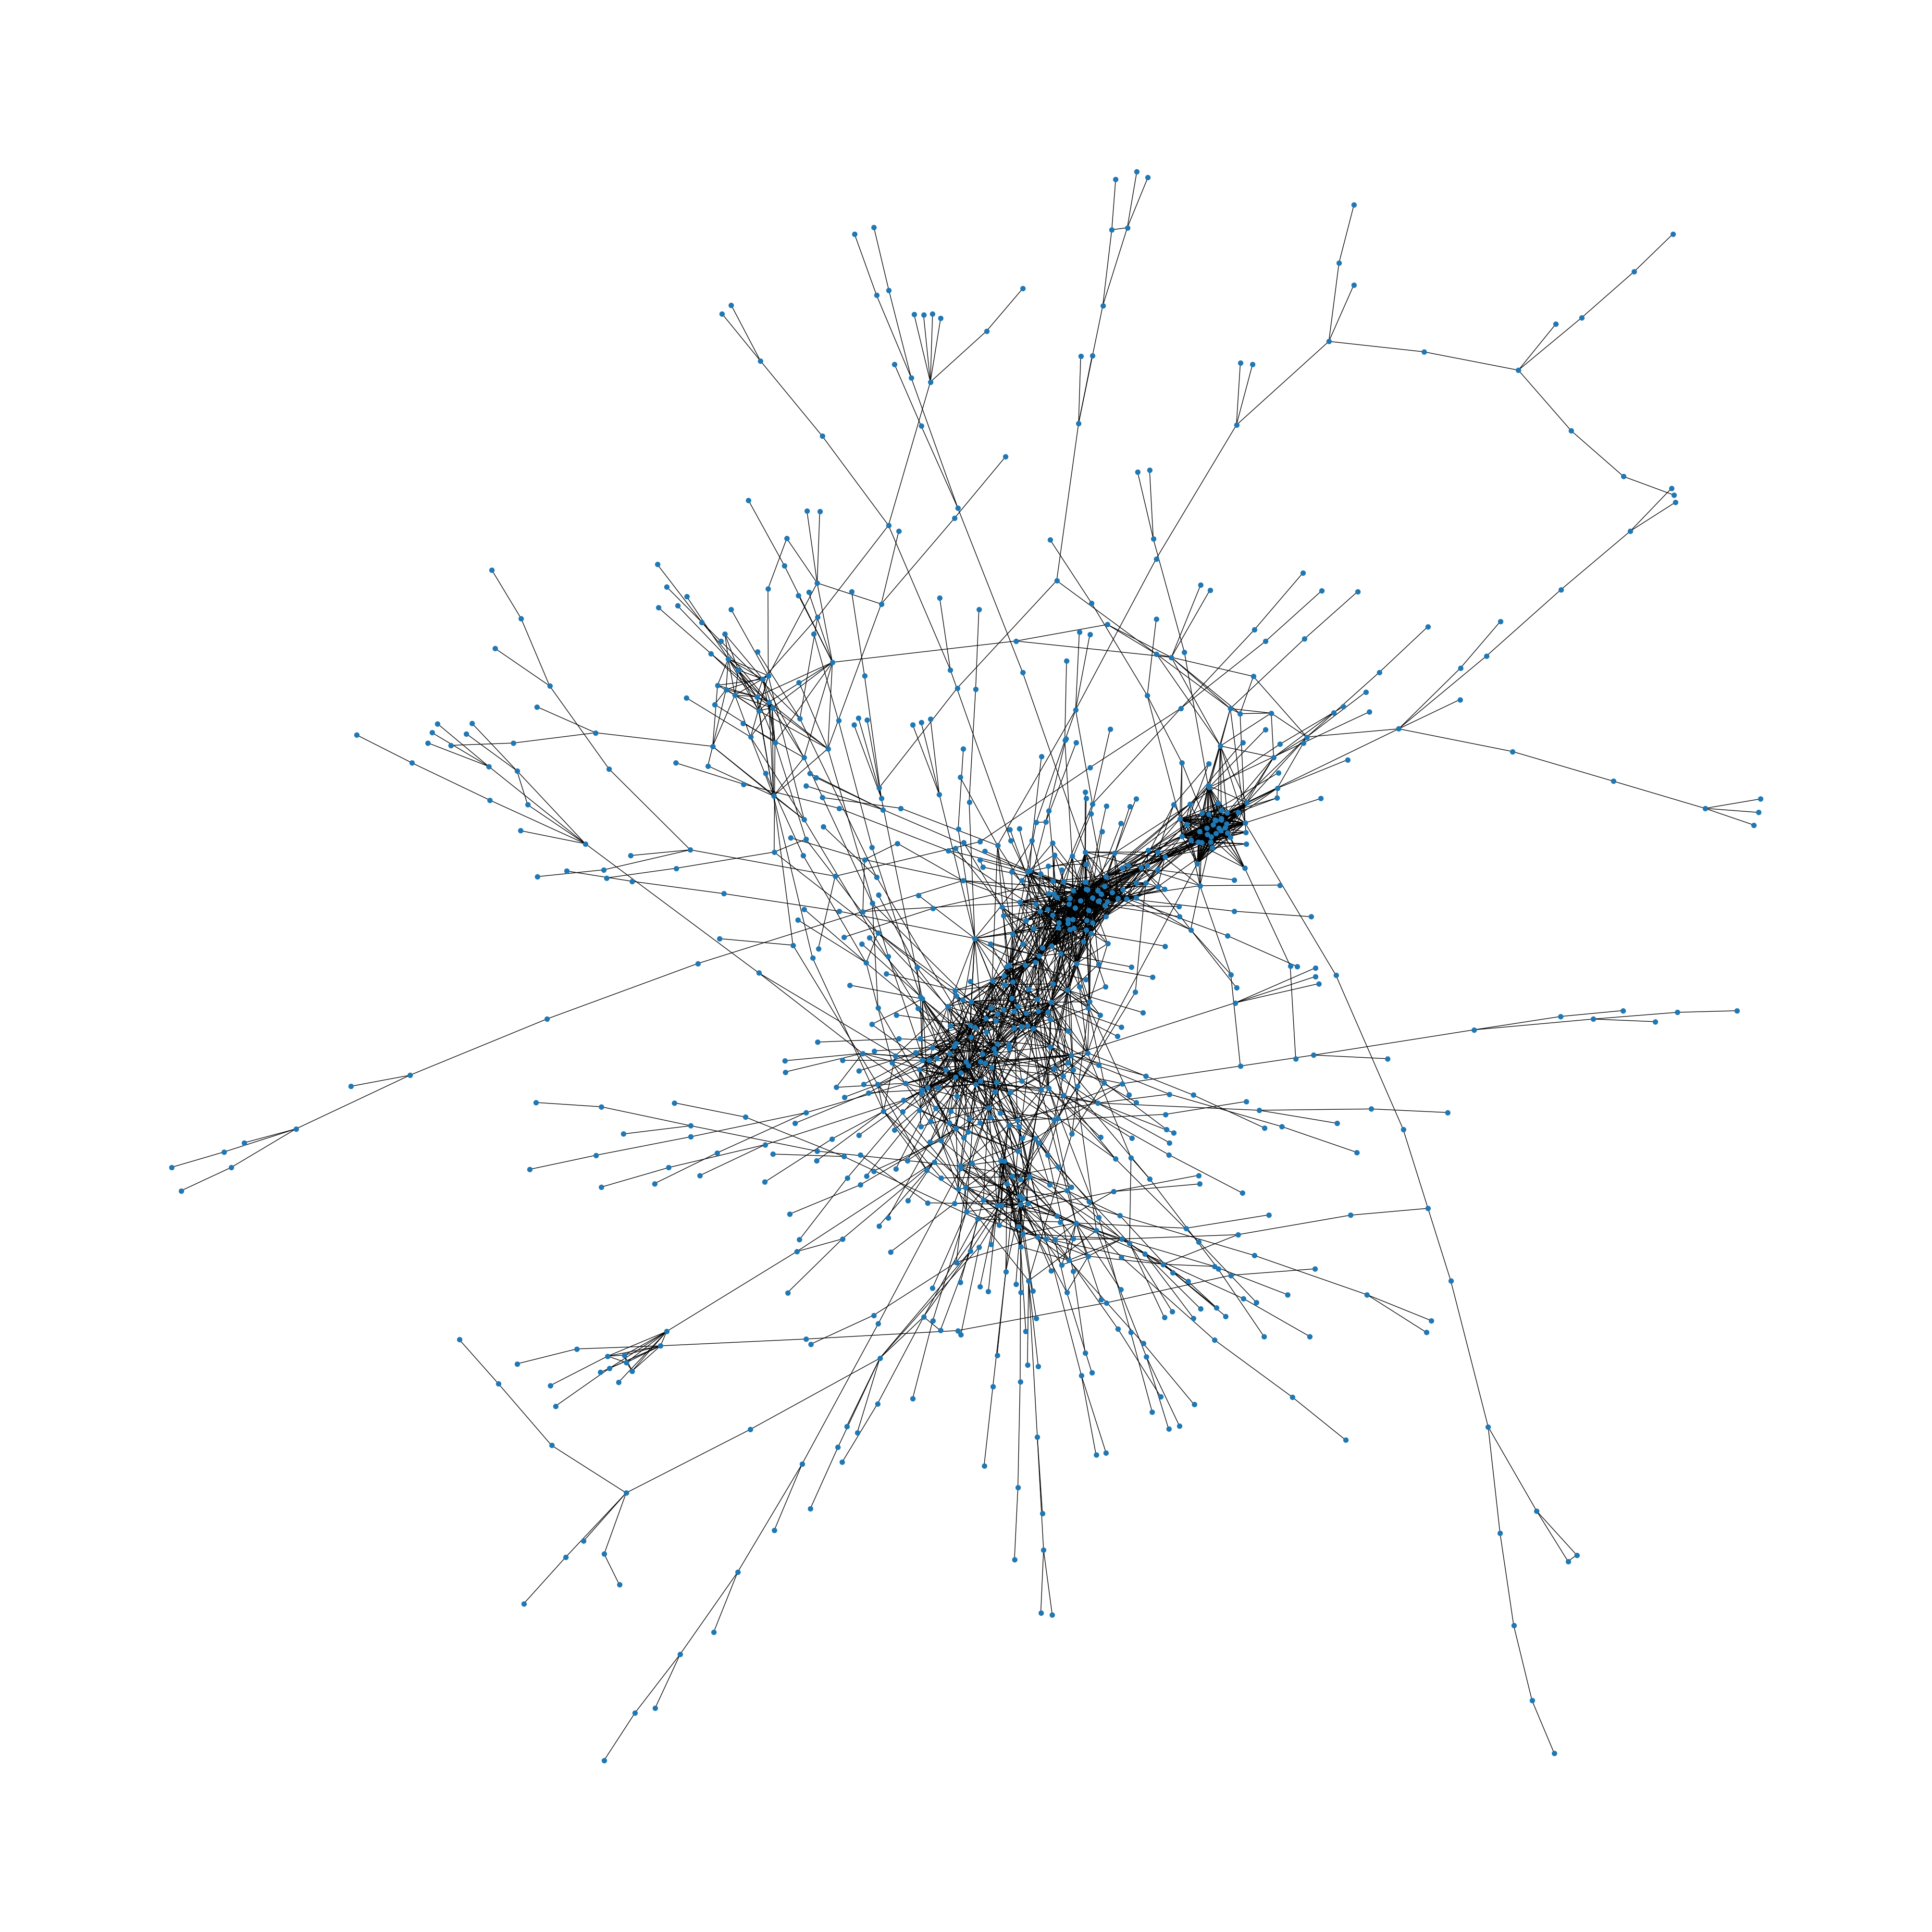

In [ ]:
# display the graph
nx.draw(graph)
# change how pretty the graph is
plt.figure(figsize=(40,40))
nx.draw(graph, node_size=50)

# get all edge weights for the graph and label diagram edges with their weights
edge_weights = nx.get_edge_attributes(graph, 'value')
nx.draw_networkx_edge_labels(graph, pos=nx.spring_layout(graph), edge_labels=edge_weights)

# display the graph
plt.show()